<a href="https://colab.research.google.com/github/The237/DeepLearningCourses/blob/main/03_01_Deep_Learning_pour_la_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
training_labels.reshape((training_images.shape[0],1))


array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

In [4]:
training_images.ndim

3

In [5]:
labels = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

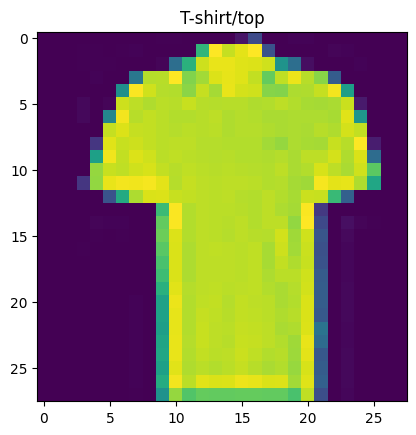

In [6]:
import matplotlib.pyplot as plt

plt.imshow(training_images[47725])
plt.title(labels[training_labels[47725]])
plt.show()

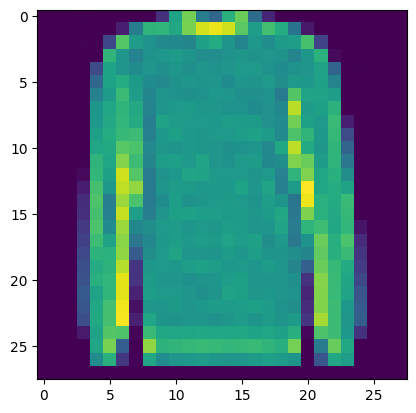

In [7]:
plt.imshow(training_images[45]/100)
plt.show()

# Flatten Images

Quitter des images carrés vers des vecteurs, par exemple si on a un dataset qui a 60 000 images de dimensions 28*28, on obtient un nouveau dataset qui aura 60 000 vecteurs et chaque vecteur aura une taille de 28*28 caractéristiques, ce qui revient à un tableau classique une peu comme un dataframe. On dit qu'on a flatten les images.

In [8]:
training_images.shape

(60000, 28, 28)

In [9]:
flat_training_images = training_images.reshape((60_000,28*28))
flat_test_images = test_images.reshape((-1,28*28))

In [10]:
flat_training_images.shape, flat_test_images.shape

((60000, 784), (10000, 784))

# One Hot Encoding

In [11]:
import numpy as np

x = np.array([1,2,1,0,3])

In [12]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [13]:
training_labels.shape, test_labels.shape

((60000, 10), (10000, 10))

In [14]:
def softmax(vect):
  r = np.exp(np.array(vect))
  return r/sum(r)

In [15]:
softmax([6, 2])

array([0.98201379, 0.01798621])

# Premier modèle de Classification

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

On doit diviser par 255 pour éviter que lorsque le réseau s'entraine, il crée des pixels qui dépassent 255 (le max qu'un pixel peut avoir).

In [17]:
flat_training_images = flat_training_images/255.0
flat_test_images = flat_test_images/255.0

In [18]:
flat_training_images.min(), flat_training_images.max()

(0.0, 1.0)

In [19]:
model = Sequential([
    Dense(units = 784, activation = "sigmoid"),
    Dense(units = 10, activation = "softmax")
  ]
)

model.compile(loss = "mse", optimizer = SGD(learning_rate = .01), metrics = ["accuracy"])
h = model.fit(flat_training_images, training_labels, epochs = 5, validation_data=(flat_test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0886 - accuracy: 0.2632 - val_loss: 0.0865 - val_accuracy: 0.2781
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0846 - accuracy: 0.3505 - val_loss: 0.0827 - val_accuracy: 0.4327
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0805 - accuracy: 0.5275 - val_loss: 0.0782 - val_accuracy: 0.5630
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0757 - accuracy: 0.5725 - val_loss: 0.0732 - val_accuracy: 0.6034
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0706 - accuracy: 0.6108 - val_loss: 0.0683 - val_accuracy: 0.6345


# MSE VS Cross Entropy ou Log Loss

In [20]:
def mse(target, prediction):
  loss = (prediction - target) **2
  return loss

In [21]:
def log_loss(target, prediction):
  loss = -1 * np.log(prediction)
  return loss

In [22]:
prediction = np.arange(0, 1, 0.01)
len(prediction)

100

In [23]:
target = np.ones_like(prediction)
len(target)

100

In [24]:
loss_mse = mse(target, prediction)
loss_ce = log_loss(target, prediction)

<ipython-input-21-b2b06ae6f7e8>:2: RuntimeWarning: divide by zero encountered in log
  loss = -1 * np.log(prediction)


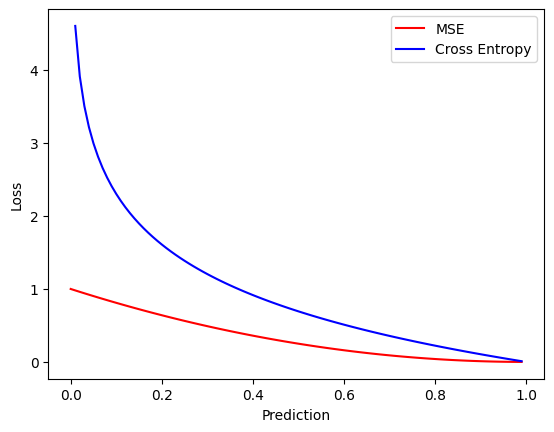

In [25]:
plt.plot(prediction, loss_mse, c= "red",label="MSE")
plt.plot(prediction, loss_ce, c= "blue", label="Cross Entropy")
plt.xlabel("Prediction")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Entrainement avec cross entropy comme loss

In [26]:
model_ce = Sequential([
    Dense(units = 784, activation = "sigmoid"),
    Dense(units = 10, activation = "softmax")
  ]
)

model_ce.compile(loss = "categorical_crossentropy", optimizer = SGD(learning_rate = .01), metrics = ["accuracy"])
h = model_ce.fit(flat_training_images, training_labels, epochs = 5, validation_data=(flat_test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 1.1337 - accuracy: 0.6683 - val_loss: 0.7924 - val_accuracy: 0.7325
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7073 - accuracy: 0.7585 - val_loss: 0.6758 - val_accuracy: 0.7585
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6222 - accuracy: 0.7840 - val_loss: 0.6118 - val_accuracy: 0.7809
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5763 - accuracy: 0.7990 - val_loss: 0.5754 - val_accuracy: 0.7981
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5457 - accuracy: 0.8095 - val_loss: 0.5566 - val_accuracy: 0.8018


MSE : loss: 0.0696 - accuracy: 0.5341 - val_loss: 0.0674 - val_accuracy: 0.5811

CROSS ENTROPY : loss: 0.5457 - accuracy: 0.8089 - val_loss: 0.5575 - val_accuracy: 0.8026

Le cross entropy permet d'avoir de plus grands loss, mais celà a un impact positif sur l'accuracy et en donne une meilleure valeur.
La vitesse de descente pour trouver le point qui minimise la fonction de perte est plus importante pour la courbe du cross entropy.

# New Activation function

In [27]:
values = np.arange(-10, 10,.01)
sig = tf.nn.sigmoid(values)

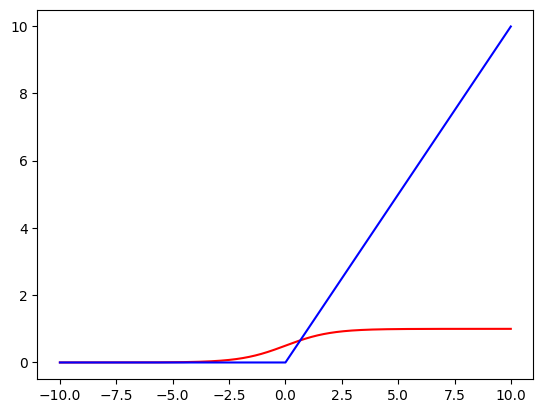

In [31]:
plt.plot(values, sig,c='r', label="Sigmoid")
plt.plot(values, relu_values, c='b', label="ReLU")
plt.show()

In [29]:
def relu(vect):
  return np.maximum(0, vect)

In [30]:
relu_values = relu(values)

In [ ]:
relu_values

# Modèle ReLU

In [32]:
model_relu = Sequential([
    Dense(units = 784, activation = "relu"),
    Dense(units = 10, activation = "softmax")
  ]
)

model_relu.compile(loss = "categorical_crossentropy", optimizer = SGD(learning_rate = .01), metrics = ["accuracy"])
h = model_relu.fit(flat_training_images, training_labels, epochs = 5, validation_data=(flat_test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6931 - accuracy: 0.7796 - val_loss: 0.5610 - val_accuracy: 0.8043
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4924 - accuracy: 0.8339 - val_loss: 0.4940 - val_accuracy: 0.8310
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4512 - accuracy: 0.8460 - val_loss: 0.4753 - val_accuracy: 0.8333
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4274 - accuracy: 0.8519 - val_loss: 0.4434 - val_accuracy: 0.8460
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4088 - accuracy: 0.8591 - val_loss: 0.4344 - val_accuracy: 0.8513


In [33]:
model_relu = Sequential([
    Dense(units = 784, activation = "relu"),
    Dense(units = 10, activation = "softmax")
  ]
)

model_relu.compile(loss = "categorical_crossentropy", optimizer = SGD(learning_rate = .01), metrics = ["accuracy"])
h = model_relu.fit(flat_training_images, training_labels, epochs = 20, validation_data=(flat_test_images,test_labels))

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6985 - accuracy: 0.7771 - val_loss: 0.5481 - val_accuracy: 0.8165
Epoch 2/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4944 - accuracy: 0.8321 - val_loss: 0.4962 - val_accuracy: 0.8287
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4531 - accuracy: 0.8457 - val_loss: 0.4701 - val_accuracy: 0.8358
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4284 - accuracy: 0.8527 - val_loss: 0.4501 - val_accuracy: 0.8423
Epoch 5/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4104 - accuracy: 0.8587 - val_loss: 0.4435 - val_accuracy: 0.8434
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3968 - accuracy: 0.8620 - val_loss: 0.4207 - val_accuracy: 0.8531
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3849 - accuracy: 0.8674 - val_loss: 0.4196 - val_ac

In [34]:
import matplotlib.pyplot as plt

def plot_loss_curve(history):
  plt.plot(list(range(len(history["loss"]))), history["loss"], label="Loss")
  plt.plot(list(range(len(history["val_loss"]))), history["val_loss"], label="Val Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Loss Curve")
  plt.legend()
  plt.show()

def plot_accuracy_curve(history):
  plt.plot(list(range(len(history["accuracy"]))), history["accuracy"], label="Accuracy")
  plt.plot(list(range(len(history["val_accuracy"]))), history["val_accuracy"], label="Val Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.title("Accuracy Curve")
  plt.legend()
  plt.show()

# Réseau de neurones plus complexe

In [35]:
model_compl = Sequential([
    Dense(units = 784, activation = "relu"),
    Dense(units = 128, activation = "relu"),
    Dense(units = 10, activation = "softmax")
  ]
)

model_compl.compile(loss = "categorical_crossentropy", optimizer = SGD(learning_rate = .01), metrics = ["accuracy"])
h = model_relu.fit(flat_training_images, training_labels, epochs = 20, validation_data=(flat_test_images,test_labels))

Epoch 1/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2972 - accuracy: 0.8957 - val_loss: 0.3581 - val_accuracy: 0.8735
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2930 - accuracy: 0.8976 - val_loss: 0.3496 - val_accuracy: 0.8751
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2904 - accuracy: 0.8979 - val_loss: 0.3568 - val_accuracy: 0.8718
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2856 - accuracy: 0.8984 - val_loss: 0.3562 - val_accuracy: 0.8701
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2818 - accuracy: 0.9001 - val_loss: 0.3469 - val_accuracy: 0.8756
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2784 - accuracy: 0.9020 - val_loss: 0.3424 - val_accuracy: 0.8765
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2749 - accuracy: 0.9033 - val_loss: 0.3391 - val_a

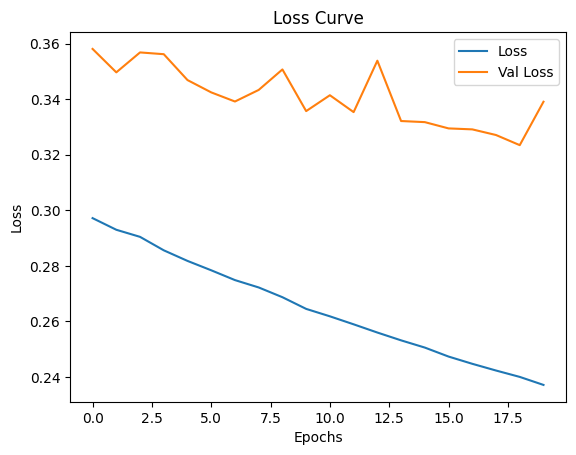

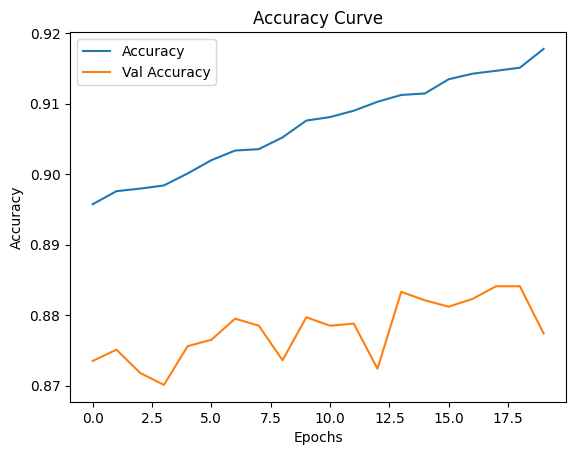

In [36]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

# Combatre l'Overfitting : DropOut

In [40]:
from tensorflow.keras.layers import Dropout

In [50]:
dropout = Dropout(.3, input_shape = (2,))

In [51]:
x = np.arange(10).reshape(5,2).astype(np.float32)

In [52]:
dropout(x, training = True)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 0.       ,  1.4285715],
       [ 2.857143 ,  4.285714 ],
       [ 0.       ,  0.       ],
       [ 8.571428 , 10.       ],
       [11.428572 , 12.857143 ]], dtype=float32)>

In [53]:
model_dropout = Sequential([
    Dense(units = 784, activation = "relu"),
    Dropout(.5),
    Dense(units = 128, activation = "relu"),
    Dropout(.3),
    Dense(units = 10, activation = "softmax")
  ]
)

model_dropout.compile(loss = "categorical_crossentropy", optimizer = SGD(learning_rate = .01), metrics = ["accuracy"])
h = model_dropout.fit(flat_training_images, training_labels, epochs = 20, validation_data=(flat_test_images,test_labels))

Epoch 1/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.8739 - accuracy: 0.6937 - val_loss: 0.5577 - val_accuracy: 0.8020
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5809 - accuracy: 0.7965 - val_loss: 0.4876 - val_accuracy: 0.8235
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5152 - accuracy: 0.8178 - val_loss: 0.4661 - val_accuracy: 0.8307
Epoch 4/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4788 - accuracy: 0.8311 - val_loss: 0.4287 - val_accuracy: 0.8451
Epoch 5/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4511 - accuracy: 0.8402 - val_loss: 0.4133 - val_accuracy: 0.8478
Epoch 6/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4332 - accuracy: 0.8461 - val_loss: 0.4032 - val_accuracy: 0.8529
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4203 - accuracy: 0.8501 - val_loss: 0.3988 - val_ac

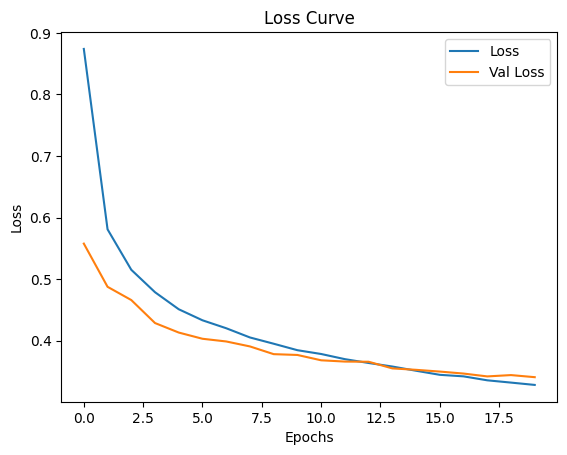

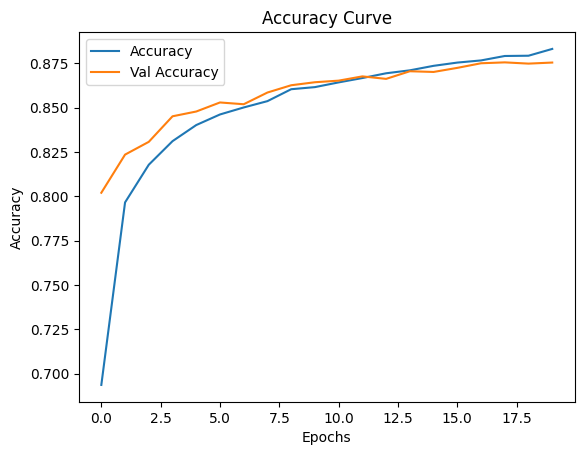

In [54]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

Le overfitting a été réduit grâce au Dropout. En désactivant 50% des neurones sur les deux premières couches

In [55]:
adam = tf.keras.optimizers.Adam(
    learning_rate = .01,
    beta_1 = .9,
    beta_2 = .999
)

In [56]:
model_adam = Sequential([
    Dense(units = 784, activation = "relu"),
    Dropout(.5),
    Dense(units = 128, activation = "relu"),
    Dropout(.3),
    Dense(units = 10, activation = "softmax")
  ]
)

model_adam.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])
h = model_adam.fit(flat_training_images, training_labels, epochs = 20, validation_data=(flat_test_images,test_labels))

Epoch 1/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.7278 - accuracy: 0.7504 - val_loss: 0.4774 - val_accuracy: 0.8281
Epoch 2/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4898 - accuracy: 0.8294 - val_loss: 0.4274 - val_accuracy: 0.8474
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4323 - accuracy: 0.8471 - val_loss: 0.4037 - val_accuracy: 0.8541
Epoch 4/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4009 - accuracy: 0.8568 - val_loss: 0.3849 - val_accuracy: 0.8615
Epoch 5/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3791 - accuracy: 0.8632 - val_loss: 0.3677 - val_accuracy: 0.8663
Epoch 6/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3610 - accuracy: 0.8711 - val_loss: 0.3580 - val_accuracy: 0.8728
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3477 - accuracy: 0.8737 - val_loss: 0.3589 -

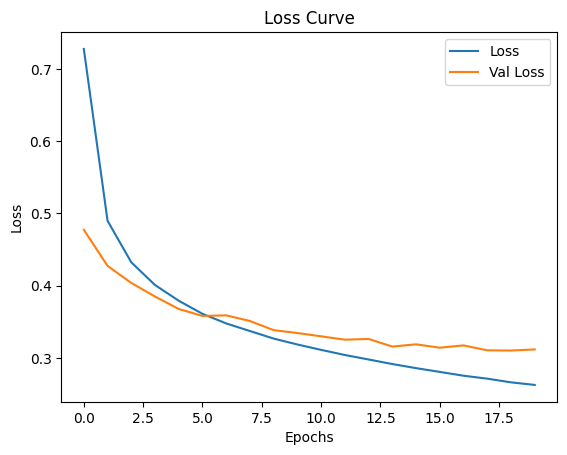

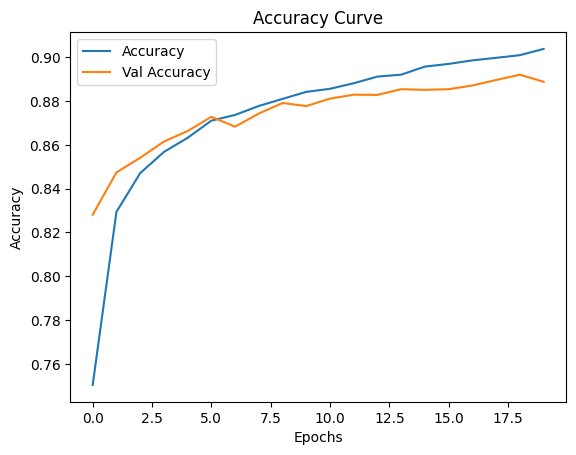

In [57]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

# Model Checkpoint

In [58]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [64]:
best_model = "best_model.h5"
# permet de sauvegarder le meileur modèle au cours de l'entrainement
model_ckp = ModelCheckpoint(filepath = best_model,
                            monitor = "val_accuracy",
                            mode ="max",
                            save_best_only = True)

In [69]:
model_w_ckp = Sequential([
    Dense(units = 784, activation = "relu"),
    Dropout(.5),
    Dense(units = 128, activation = "relu"),
    Dropout(.3),
    Dense(units = 10, activation = "softmax")
  ]
)

model_w_ckp.compile(loss = "categorical_crossentropy", optimizer = SGD(learning_rate = .01), metrics = ["accuracy"])
h = model_w_ckp.fit(flat_training_images, training_labels,
                    epochs = 30,
                    validation_data=(flat_test_images,test_labels),
                    callbacks = [model_ckp])

Epoch 1/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.8606 - accuracy: 0.6974 - val_loss: 0.5649 - val_accuracy: 0.7994
Epoch 2/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5811 - accuracy: 0.7970 - val_loss: 0.4912 - val_accuracy: 0.8285
Epoch 3/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5137 - accuracy: 0.8198 - val_loss: 0.4524 - val_accuracy: 0.8418
Epoch 4/30
  25/1875 [..............................] - ETA: 11s - loss: 0.4810 - accuracy: 0.8325

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 15s 8ms/step - loss: 0.4762 - accuracy: 0.8324 - val_loss: 0.4309 - val_accuracy: 0.8456
Epoch 5/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4540 - accuracy: 0.8386 - val_loss: 0.4249 - val_accuracy: 0.8455
Epoch 6/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4336 - accuracy: 0.8458 - val_loss: 0.4059 - val_accuracy: 0.8561
Epoch 7/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4189 - accuracy: 0.8503 - val_loss: 0.3976 - val_accuracy: 0.8563
Epoch 8/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4048 - accuracy: 0.8549 - val_loss: 0.3878 - val_accuracy: 0.8592
Epoch 9/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3948 - accuracy: 0.8586 - val_loss: 0.3817 - val_accuracy: 0.8635
Epoch 10/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3892 - accuracy: 0.8612 - val_loss: 0.3745 - val_accuracy

KeyboardInterrupt: ignored

In [71]:
model_save = tf.keras.models.load_model('best_model.h5')

In [72]:
model_save.evaluate(flat_test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3555 - accuracy: 0.8721


[0.3554961085319519, 0.8720999956130981]

# Early Stopping

In [70]:
stop = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 2)

In [73]:
model_w_ckp2 = Sequential([
    Dense(units = 784, activation = "relu"),
    Dropout(.5),
    Dense(units = 128, activation = "relu"),
    Dropout(.3),
    Dense(units = 10, activation = "softmax")
  ]
)

model_w_ckp2.compile(loss = "categorical_crossentropy", optimizer = SGD(learning_rate = .01), metrics = ["accuracy"])
h = model_w_ckp2.fit(flat_training_images, training_labels,
                    epochs = 1000,
                    validation_data=(flat_test_images,test_labels),
                    callbacks = [model_ckp, stop])

Epoch 1/1000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.8569 - accuracy: 0.7016 - val_loss: 0.5481 - val_accuracy: 0.8075
Epoch 2/1000
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5750 - accuracy: 0.8004 - val_loss: 0.4809 - val_accuracy: 0.8287
Epoch 3/1000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5106 - accuracy: 0.8196 - val_loss: 0.4527 - val_accuracy: 0.8387
Epoch 4/1000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4760 - accuracy: 0.8326 - val_loss: 0.4309 - val_accuracy: 0.8443
Epoch 5/1000
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4498 - accuracy: 0.8422 - val_loss: 0.4148 - val_accuracy: 0.8512
Epoch 6/1000
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4296 - accuracy: 0.8466 - val_loss: 0.4095 - val_accuracy: 0.8525
Epoch 7/1000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4156 - accuracy: 0.8529 - val_loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 14s 8ms/step - loss: 0.3440 - accuracy: 0.8784 - val_loss: 0.3487 - val_accuracy: 0.8739
Epoch 17/1000
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3398 - accuracy: 0.8785 - val_loss: 0.3484 - val_accuracy: 0.8743
Epoch 18/1000
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3364 - accuracy: 0.8794 - val_loss: 0.3420 - val_accuracy: 0.8758
Epoch 19/1000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3299 - accuracy: 0.8810 - val_loss: 0.3478 - val_accuracy: 0.8738
Epoch 20/1000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3274 - accuracy: 0.8829 - val_loss: 0.3376 - val_accuracy: 0.8790
Epoch 21/1000
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3227 - accuracy: 0.8850 - val_loss: 0.3400 - val_accuracy: 0.8760
Epoch 22/1000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3176 - accuracy: 0.8852 - val_loss: 0.3333 -

# Predictions

In [74]:
model_save = tf.keras.models.load_model('best_model.h5')

In [75]:
model_save.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 784)               615440    
                                                                 
 dropout_15 (Dropout)        (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               100480    
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717210 (2.74 MB)
Trainable params: 717210 (2.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
flat_test_images[12].shape

(784,)

In [90]:
test_labels[12]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [96]:
np.argmax(test_labels[12])

7

In [97]:
labels[7]

'Sneaker'

In [98]:
pred = model.predict(flat_test_images[12].reshape((1,784)))

1/1 [==============================] - 0s 23ms/step


In [99]:
pred

array([[0.04732384, 0.06557103, 0.04127071, 0.05668237, 0.03319627,
        0.25638226, 0.03531777, 0.2729944 , 0.1180804 , 0.07318087]],
      dtype=float32)

In [100]:
np.argmax(pred)

7

In [101]:
labels[7]

'Sneaker'